# CS-401/501 - Programming for Data Science

## Linear Regression Example

1. Get Human Height/Weight data from the web (HTML document).
1. Parse HTML with BeautifulSoup (`bs4`) to retrieve raw data figures.
1. Create a `pandas` `DataFrame` using the data (25,000 records).
1. Explore the sample and type the data correctly (convert strings to floats).
1. Get a random sampling of 500 records from the data set.
1. Use `matplotlib` to to create a scatter plot of the sample (make it look nice).
1. Manually calculate a Linear Regression (line of best fit), and plot the line over the data points.
  1. Define helper functions to:
    1. Calculate the equation of a line (slope and y-intercept), given 2 points (e.g. `p0 = (x0, y0)` and `p1 = (x1, y1)`).
    1. Calculate a set of corresponding y-values given a set of x-values and an equation of a line (and vice-versa).
  1. Define these helper charting functions:
    1. Plot a scatter plot of the sample data.
    1. Plot a line based on an equation (pass in slope and y-intercept).
  1. Modify your sample data frame to include columns for $x^2$, $y^2$, $xy$, for statistical calculations.
  1. Define statistical functions to calculate the following:
    1. Pearson's correlation coefficient (`r`)
    1. Linear regression slope (`m`)
    1. Linear regression y-intercept (`b`)
1. Using `sklearn` tooling, calculate a Linear Regression of the sample data.  Plot points and the line.

---

# Simple Data Mining

## Web Scraping and Parsing HTML

### 1) Get Human Height/Weight data from the web (HTML document).

Access web data on Human Height and Weigth information. Programmatically retrieve the HTML document from the URL:

<http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html>

A duplicate of the data is available here:

<https://cs.indstate.edu/~lmay1/assets/datasets/html/heights-and-weights-25000.html>

Make sure, if, for whatever reason, one of the sites becomes on available, your code will automatically use the other URL.

In [1]:
import urllib.request

data_urls = [
    "https://cs.indstate.edu/~lmay1/assets/datasets/html/heights-and-weights-25000.html",
    "http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html",
]

In [2]:
# ADD YOUR CODE HERE
import pandas as pd
import urllib.request


try:
    with urllib.request.urlopen(data_urls[0]) as req_data:
        req_data = req_data.read().decode("utf-8")
except:
    with urllib.request.urlopen(data_urls[1]) as req_data:
        req_data = req_data.read().decode("utf-8")

# for i in data:
#     req_dataca


In [3]:
# Prints the first 500 characters of the data retrieved
print(req_data[:500])

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<!-- saved from url=(0088)http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html -->
<html><head><meta http-equiv="Content-Type" content="text/html; charset=windows-1252">
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>

This data set has been duplicated from <a href="http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html">http://


### 2) Parse HTML with BeautifulSoup (`bs4`) to retrieve raw data figures.

Use a python module called **BeautifulSoup** (`bs4`) to parse the data into a data structure that can be easily explored.

In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(req_data, 'html.parser')
print(soup.prettify()[0:500])

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<!-- saved from url=(0088)http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html -->
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
 </head>
 <body>
  This data set has been duplicated from
  <a href="http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html">


Notice that the indentation formatting has changed slightly.  What Beautiful Soup has done here is parse all of the sting data into a data structure similar to what web browser's do, forming a kind of HTML Document Object Model(DOM). When we print out this complex data structure, Python automatically converts it back into teh string form that we are used to seeing in an HTML page.  When it does this, it uses it's own formatting rules for the HTML text.  Note that the DOM-like data structure is still intact and can be explored much easier than a raw string blob.

Now locate the HTML `<table>` element containing our height/weight information using `soup.find_all("table")`.  This will return a list of all the `<table>` elements in the document. Since we have only one, you will retrieve the element from the list using the zero index (`[0]`).  Then use the method `.get_text()` to retrieve all of the data that would normally be displayed from the table.  This method effectively ignores all the HTML tags and attributes, and only returns text child nodes of the HTML. 

In [5]:
# ADD YOUR CODE HERE
table_text=soup.find_all("table")[0]
table_text=table_text.get_text()
table_text

'\n \n\nIndex\nHeight(Inches)\nWeight(Pounds)\n\n\n1\n65.78331\n112.9925\n\n\n2\n71.51521\n136.4873\n\n\n3\n69.39874\n153.0269\n\n\n4\n68.2166\n142.3354\n\n\n5\n67.78781\n144.2971\n\n\n6\n68.69784\n123.3024\n\n\n7\n69.80204\n141.4947\n\n\n8\n70.01472\n136.4623\n\n\n9\n67.90265\n112.3723\n\n\n10\n66.78236\n120.6672\n\n\n11\n66.48769\n127.4516\n\n\n12\n67.62333\n114.143\n\n\n13\n68.30248\n125.6107\n\n\n14\n67.11656\n122.4618\n\n\n15\n68.27967\n116.0866\n\n\n16\n71.0916\n139.9975\n\n\n17\n66.461\n129.5023\n\n\n18\n68.64927\n142.9733\n\n\n19\n71.23033\n137.9025\n\n\n20\n67.13118\n124.0449\n\n\n21\n67.83379\n141.2807\n\n\n22\n68.87881\n143.5392\n\n\n23\n63.48115\n97.90191\n\n\n24\n68.42187\n129.5027\n\n\n25\n67.62804\n141.8501\n\n\n26\n67.20864\n129.7244\n\n\n27\n70.84235\n142.4235\n\n\n28\n67.49434\n131.5502\n\n\n29\n66.53401\n108.3324\n\n\n30\n65.44098\n113.8922\n\n\n31\n69.5233\n103.3016\n\n\n32\n65.8132\n120.7536\n\n\n33\n67.8163\n125.7886\n\n\n34\n70.59505\n136.2225\n\n\n35\n71.80484\n

In [6]:
# Print the first 100 characters of the table text
print(table_text[:100])


 

Index
Height(Inches)
Weight(Pounds)


1
65.78331
112.9925


2
71.51521
136.4873


3
69.39874
153


### 3) Create a `pandas` `DataFrame` using the data (25,000 records).

Use your basic python coding skills to convert this into a `pandas` `DataFrame`.  Display the `.head()` of the `DataFrame` using the `IPython.display` function.  This is the default method that `Jupyter Notebook` uses to print the last variable in a code cell. The resulting image should look something something like this:

![Height/Weight Table](https://cs.indstate.edu/~lmay1/assets/linear-regression/height-weight-table.png "Height/Weight Table")

In [7]:
import pandas as pd
from IPython.display import display

In [8]:
# ADD YOUR CODE HERE

# Make into a list and split by newline
table_text=table_text.split()
("\n").join(table_text)

# create 3 lists to append respective colums
index=[]
height=[]
weight=[]

count=0
ic=1
hc=2
wc=3

# loop through the lines, every 1st line is the index, 2nd is the height and 3rd is the weight
for line in table_text:
    count+=1
    if count == ic:
        index.append(line)
        ic+=3
    elif count == hc:
        height.append(line)
        hc+=3
    elif count == wc:
        weight.append(line)
        wc+=3
        
# turn 3 lists into one df and set index colum
height_weight=pd.DataFrame({index[0]:index[1:], height[0]:height[1:], weight[0]:weight[1:]}).set_index(index[0])

In [9]:
# IPython.display function displaying the `.head()` of the data frame `height_weight`
display(height_weight.head())
display(height_weight.tail())

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.2166,142.3354
5,67.78781,144.2971


,Height(Inches),Weight(Pounds)
Index,,
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655
24999,67.52918,132.2682
25000,68.87761,124.8742


### 4) Explore the sample and type the data correctly (convert strings to floats).

Run `height_weight.info()` or `height_weight.dtypes` too see what type of data you are dealing with in the data frame.

In [10]:
# View the data types
display(height_weight.info())
print("="*55)
display(height_weight.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Height(Inches)  25000 non-null  object
 1   Weight(Pounds)  25000 non-null  object
dtypes: object(2)
memory usage: 585.9+ KB


None

Height(Inches)    object
Weight(Pounds)    object
dtype: object

When you have string data, the type is shown as `object`, because, in lower-level programming languages, strings are considered more complex data types than Python makes them out to be for us. However, the `object` type can also sometimes mean some other complex Python object.

**Important** - If you try to plot string data using `matplotlib` you will simply get graphs that are ascending, because `matplotlib` cannot numerically compare `string` data.  See the example plot below: 

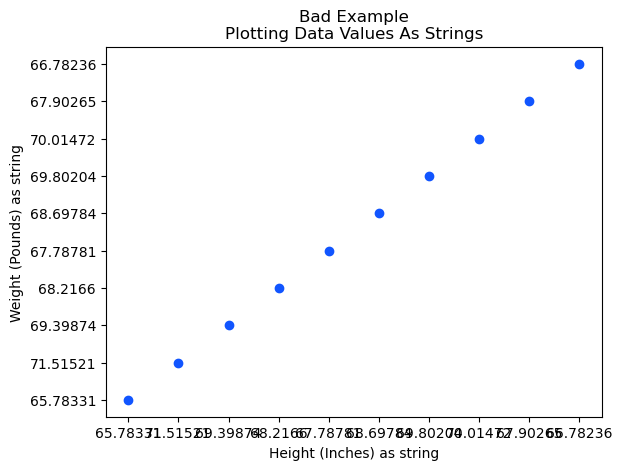

In [11]:
import matplotlib.pyplot as plt 
# Bad Example - Plotting data values as strings
df = height_weight.iloc[:10, :]
plt.title("Bad Example\nPlotting Data Values As Strings")
plt.xlabel("Height (Inches) as string")
plt.ylabel("Weight (Pounds) as string")
plt.scatter(df.iloc[:, 0], df.iloc[:, 0], c="#15f")

Notice the tick labels onm the `y` and `x` axes are not incrementing.  That's because it is string data being plotted, and not floating-point decimal data.

Convert your data to type `float`.

In [12]:
# ADD YOUR CODE HERE
height_weight["Height(Inches)"]=height_weight["Height(Inches)"].astype(str).apply(pd.to_numeric)
height_weight["Weight(Pounds)"]=height_weight["Weight(Pounds)"].astype(str).apply(pd.to_numeric)

In [13]:
# View the data types
display(height_weight.info())
print("="*55)
display(height_weight.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 585.9+ KB


None

Height(Inches)    float64
Weight(Pounds)    float64
dtype: object

You should now see types `float64`. Now, for the sake of saving ourselves typing, we will rename our columns such that the `"Height(Inches)"` column will be simply called `"x"`, and the `"Weight(Pounds)"` columns will be called `"y"`.

$$
x = height
$$

$$
y = weight
$$

In [14]:
# ADD YOUR CODE HERE
# Rename the columns as described above. Save the change `inplace`.
height_weight.rename(columns={"Height(Inches)": "x","Weight(Pounds)":"y" }, inplace=True)

In [15]:
# Display the top records in the data frame with `.head()`
display(height_weight.head())

,x,y
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


### 5) Get a random sampling of 500 records from the data set.

To make the calculations easier, we will randomly select on 500 of the 25,000 records into a sample we will use.  Luckily `pandas.DataFrame`s have a simple method to do this called `.sample(num_records)`.  Go ahead and same the number of records you want in the variable `n`, because we will reference that in later calculations.  Save your sample data in a variable called `smpl`.

In [16]:
# ADD YOUR CODE HERE
n=500
smpl=height_weight.sample(500)

In [17]:
# Print `n` and verify it matches the lenth, then displauy the sample data frame.
print(n, len(smpl))
display(smpl.head())

500 500


,x,y
Index,,
22339,70.21958,133.1982
18677,71.97900,152.6473
7505,69.87508,154.3167
18833,67.11634,132.4605
20434,69.68169,129.6650


### 6) Use `matplotlib` to to create a scatter plot of the sample (make it look nice).  

An example of how this should look:

![Height/Weight Example Scatter Plot](https://cs.indstate.edu/~lmay1/assets/linear-regression/height-weight-scatter.png "Height/Weight Example Scatter Plot")

In [18]:
import matplotlib.pyplot as plt
# might want `numpy` to set `xlim` and `ylim` 
#   `.ceil()` `.floor()` `.min()` `.max()`
import numpy as np 

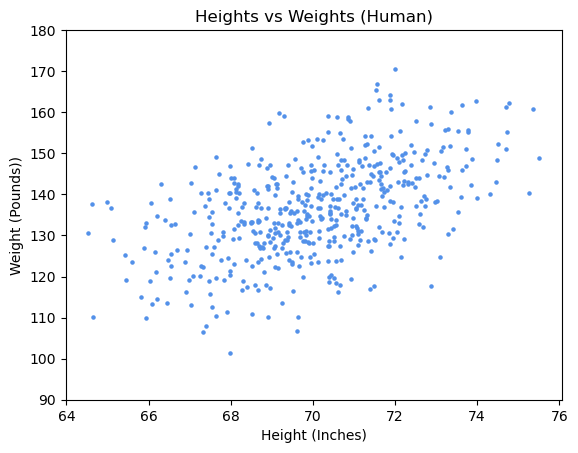

In [19]:
# ADD YOUR CODE HERE
plt.scatter(smpl.x, smpl.y, s=5, c="#5391e9")
plt.title("Heights vs Weights (Human)")
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds))")

lity=[y for y in range(80,180,10)]
liy = [y for y in range(90,190,10)]

litx =[x for x in range(62,76,2)]
lix = [x for x in range(64,78,2)]

plt.yticks(lity, liy)
plt.xticks(litx, lix)
plt.show()

---

## Manual Linear Regression

### 7) Manually calculate a Linear Regression (line of best fit), and plot the line over the data points.

#### A) Create linear equation helper functions

##### a. Create a helper function to calculate the equation of a line (slope and y-intercept), given 2 points (e.g. `p0 = (x0, y0)` and `p1 = (x1, y1)`.

You'll recall from Algebra, that the equation of a line is:

<div style="text-align: center; font-weight: bold;">
Equation of a line
</div><br/>
$$
    y = mx + b
$$

where

$$
    m = \mbox{slope}\\
    b = \mbox{y-intercept}
$$

So to store an equation of a line, we can simply create a 2-tuple with the slope and the y-intercept (e.g. `eq = (m, b)`). This allows us to pass the equation as a parameter in a function, and then we can reconstruct it when we need to make calculations with respect to `x` and `y`.

Create a function to calculate the equation of a line `(m, b)` from 2 points.

In [20]:
# ADD YOUR CODE HERE

p0=()
p1=()
def eq_line_from_2pts(p0,p1):
    m=(p1[1]-p0[1])/(p1[0]-p0[0])
    
    # got help on how to calculate b from: "https://www.mometrix.com/academy/y-intercept/#:~:text=To%20find%20the%20y%2Dintercept%20from%20a%20quadratic%20equation%2C%20substitute,of%20c%20in%20the%20equation."
    b=p1[1]-(m*p1[0])
    return (m,b)

Test you function with the following examples.  The code should return the equation `eq = (m, b) = (2.0, 1.0)`.

In [21]:
print(eq_line_from_2pts((1,3),(2,5)))

(2.0, 1.0)


#### b) Calculate a set of corresponding y-values given a set of x-values and an equation of a line (and vice-versa).

Create functions `y_from_eq_line(eq, x)` and `x_from_eq_line(eq, y)`.  These should work if you provide a `list`, an `np.ndarray` or a `pd.core.series.Series` of values.  The return type should match the input type.  

In [22]:
# ADD YOUR CODE HERE
eq=()
# y=[]
def y_from_eq_line(eq, *x):
    m=eq[0]
    b=eq[1]
    try:       
        y=[(m*a) + b for a in x ]
    except:
        # Got help from: https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists
        li = []
        for i in x:
            for item in i:
                li.append(item)
        y=[(m*a) + b for a in li ]
    return y 

def x_from_eq_line(eq, *y):
    m=eq[0]
    b=eq[1]
    try:
        x=[(c-b)/m for c in y ]
    except:
        li = []
        for i in y:
            for item in i:
                li.append(item)
        x=[(c-b)/m for c in li ]
    return x

    

Test your functions with the code below.  The results should be:

```
[7.0, 9.0]
[7. 9.]
0    7.0
1    9.0
dtype: float64
--------------------
[3.0, 4.0]
[3. 4.]
0    3.0
1    4.0
dtype: float64
```

In [23]:
eq = (2.0, 1.0)

x_li = [3, 4]
x_arr = np.array(x_li)
x_s = pd.Series(x_li)

print(y_from_eq_line(eq, x_li))
print(y_from_eq_line(eq, x_arr))
print(y_from_eq_line(eq, x_s))

print("-"*20)

y_li = [7, 9]
y_arr = np.array(y_li)
y_s = pd.Series(y_li)

print(x_from_eq_line(eq, y_li))
print(x_from_eq_line(eq, y_arr))
print(x_from_eq_line(eq, y_s))

[7.0, 9.0]
[array([7., 9.])]
[0    7.0
1    9.0
dtype: float64]
--------------------
[3.0, 4.0]
[array([3., 4.])]
[0    3.0
1    4.0
dtype: float64]


### Plotting Helper Functions

#### A) Create plotting helper functions

Create some helper functions to construct your charts.  Make a function to scatter plot the sample sample points, and then create another function to plot additional lines on top of the scatter plot.  To do this, each function will need to access the `fig`, `ax`, and/or `plt` objects.  Eventually we will do something like this:

```
fig, ax = plt.subplots(figsize=(6, 4))
plot_points(data, n=3)
plot_line(eq)
plt.show()
```

##### a) Create a function to plot a scatter plot of the sample data.

```
plot_points(data_frame, n=None, c=None)
```

You may want to use `.iloc[:n,:]` to select the records, the to select the x and y values use `.iloc[:, 0]` and `.iloc[:, 0]` respectively. 


##### b) Create a function to plot a line based on the equation of a line.  

```
plot_line(eq, c=None)
```

You may want to calculate the points to plot from your `xlim` variable on the plot itself.  This variable defines the viewable edges of the chart in the x direction.  This will make the line plot cross the entire chart. 

In [24]:
# ADD YOUR CODE HERE (BOTH FUCNTIONS)
def plot_points(data_frame, n=None, c=None):    
    plt.scatter(data_frame.iloc[:n, 0], data_frame.iloc[:n, 1], c=None )

def x_lim(data_frame,n):
    return [i for i in data_frame.iloc[:n, 0]]

def plot_line(eq, c=None):
    y=y_from_eq_line(eq, xlim)
    plt.plot(xlim,y, c="red")

The following code should test both of your functions.  The resulting graph should have 3 points and a line drawn between two points, similar to this:

![Height/Weight 3 Points With A Line](https://cs.indstate.edu/~lmay1/assets/linear-regression/height-weight-3-data-points-and-a-line.png "Height/Weight 3 Points With A Line")

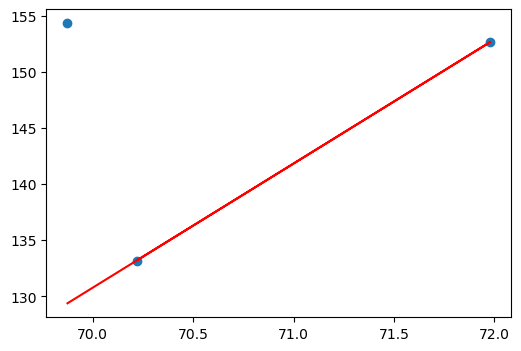

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_points(smpl, n=3)
pt0 = (smpl["x"].values[0], smpl["y"].values[0])
pt1 = (smpl["x"].values[1], smpl["y"].values[1])
eq = eq_line_from_2pts(pt0, pt1)
n=3
xlim=x_lim(smpl,3)
plot_line(eq)
plt.show()

---

## Statistics

#### C) Modify your sample data frame (`smpl`) to include columns for $x^2$, $y^2$, $xy$, for statistical calculations.

If you want your data frame column labels to be displayed with **LaTex** use the following strings as the labels:

```
smpl["$x^2$"] = # add column for x squared
smpl["$y^2$"] = # add column for y squared
smpl["$xy$"] =  # add column for x times y
```

Next, generate a separate frame/series called `totals` with the sums of each column of the `smpl` data frame.

In [26]:
# ADD YOUR CODE HERE
smpl["x^2"] = smpl["x"]**2
smpl["y^2"] = smpl["y"]**2
smpl["xy"] = smpl["x"]*smpl["y"]

t_x=["x",smpl["x"].sum()]
t_y=["y",smpl["y"].sum()]
t_y2=["x^2",smpl["x^2"].sum()]
t_x2=["y^2",smpl["y^2"].sum()]
t_xy=["xy",smpl["xy"].sum()]
n=["n",len(smpl)]

li=[]
li.append(n)
li.append(t_x)
li.append(t_y)
li.append(t_x2)
li.append(t_y2)
li.append(t_xy)
totals=pd.DataFrame(li).set_index(0)

View your changes here.  It should look something like this:

![Table with Stats Columns](https://cs.indstate.edu/~lmay1/assets/linear-regression/height-weight-stats-table.png "Table with Stats Columns")

```
x        3.399835e+04
y        6.357623e+04
$x^2$    2.313595e+06
$y^2$    8.155059e+06
$xy$     4.328341e+06
dtype: float64
```

In [27]:
display(smpl.head())
display(totals)

,x,y,x^2,y^2,xy
Index,,,,,
22339,70.21958,133.1982,4930.789415,17741.760483,9353.121661
18677,71.97900,152.6473,5180.976441,23301.198197,10987.400007
7505,69.87508,154.3167,4882.526805,23813.643899,10782.891758
18833,67.11634,132.4605,4504.603095,17545.784060,8890.263955
20434,69.68169,129.6650,4855.537921,16813.012225,9035.276334


,1
0,
n,5.000000e+02
x,3.401988e+04
y,6.324156e+04
y^2,8.068722e+06
x^2,2.316819e+06
xy,4.309197e+06


## Is There a Linear Relationship to the Data?

#### C) Define statistical functions to calculate the following:

### Correlation Coefficient (Pearson's)

There are a few methods to calculate a coefficient to show how strong the relationship is between two variables.  Here we will define a function called `pearsons` to calculate the **Pearson's Correlation Coefficient**.

<div style="text-align: center; font-weight: bold;">
Pearson's Correlation Coefficient
</div><br/>
$$
    r = \frac
    {n(\Sigma xy)-(\Sigma x)(\Sigma y)}
    {\sqrt{[n\Sigma x^2 -(\Sigma x)^2][n\Sigma y^2 -(\Sigma y)^2]}}
$$

##### a) Pearson's correlation coefficient (`r`)

In [28]:
# ADD YOUR CODE HERE

def pearsons(x):
    num=x.loc["n"]*x.loc["xy"]-x.loc["x"]*x.loc["y"]
    denum=((x.loc["n"]*x.loc["x^2"]-(x.loc["x"]**2))*(x.loc["n"]*x.loc["y^2"]-(x.loc["y"]**2)))**0.5
    return num/denum
           
            
            

Test your code here.  The resulting coefficient should be around `0.45` - `0.52` (+/-) depending on the random sampling.

In [29]:
r = pearsons(totals)
print(r)

1    0.51518
dtype: float64


---

### Linear Regression Formulas

<div style="text-align: center; font-weight: bold;">
Equation of a line
</div><br/>
$$
    y = mx + b
$$
<br/>
<div style="text-align: center; font-weight: bold;">
Slope
</div><br/>
$$
    m = \frac
    {n(\Sigma xy)-(\Sigma x)(\Sigma y)}
    {n(\Sigma x^2)-(\Sigma x)^2}
$$
<br/>
<div style="text-align: center; font-weight: bold;">
Y-intercept
</div><br/>
$$
    b = \frac
    {(\Sigma y)(\Sigma x^2)-(\Sigma x)(\Sigma xy)}
    {n(\Sigma x^2)-(\Sigma x)^2}
$$

##### b)  Linear regression slope (`m`)
##### c) Linear regression y-intercept (`b`)

In [30]:
# ADD YOUR CODE HERE (BOTH FUNCTIONS)

def linear_regression_slope(x):
    num = (x.loc["n"]*x.loc["xy"])-(x.loc["x"]*x.loc["y"])
    denum= (x.loc["n"]*x.loc["x^2"])-(x.loc["x"]**2)
    return num/denum

def linear_regression_y_intercept(x):
    num=(x.loc["y"]*x.loc["x^2"])-(x.loc["x"]*x.loc["xy"])
    denum = (x.loc["n"]*x.loc["x^2"])-(x.loc["x"]**2)
    return num/denum

Test your functions with the code below.  The result will depend on your sample, but should be somehwere around:

```
2.8
-69.0
```

In [31]:
eq_linear_regression = (linear_regression_slope(totals), linear_regression_y_intercept(totals))
m, b = eq_linear_regression
print(m)
print(b)

1    2.958502
dtype: float64
1   -74.812628
dtype: float64


Now you should be able to plot your sample data and the linear regression line.

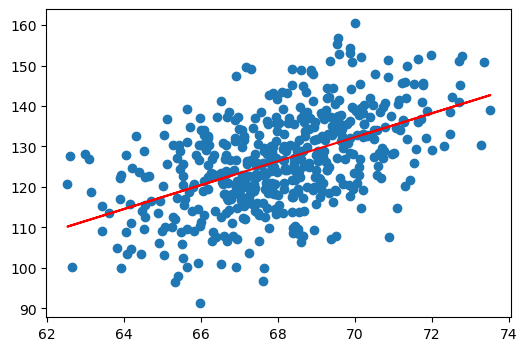

In [32]:
fig, ax = plt.subplots(figsize=(6, 4))
n=len(smpl)
xlim=x_lim(smpl,n)
plot_points(smpl, n)
plot_line(eq_linear_regression, c="red")
plt.show()

---

## Linear Regression Using Tools (Much Easier)

### 8) Using `sklearn` tooling, calculate a Linear Regression of the sample data.  Plot points and the line.

Here we will complete the same steps using the scikit-learn (`sklearn`) module.

<https://scikit-learn.org/stable/index.html>

This is a much easier method of calculating a linear regression and would generally be a method used professionally (rather than the manual calculations we made)

In [33]:
import sklearn
from sklearn.linear_model import LinearRegression

In [34]:
linear_regression = LinearRegression()
x_arr = np.array(smpl["x"].values).reshape(-1, 1)
y_arr = np.array(smpl["y"].values).reshape(-1, 1)
fit = linear_regression.fit(x_arr, y_arr)

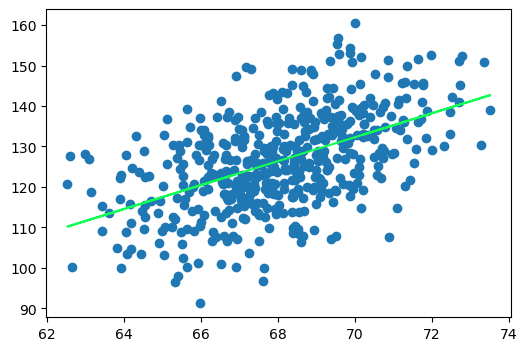

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_points(smpl, n)
plt.plot(x_arr, fit.predict(x_arr), c="#1f5")
plt.show()